# Assignment 2 - NYC Property Sales
**A year's worth of properties sold on the NYC real estate market**

Dalam tugas ini digunakan data dari Kaggle, yaitu "NYC Property Sales". Dari data tersebut akan dilakukan analisis descriptive statistics dan inferential statistics untuk menarik kesimpulan dari data tersebut. Analisis akan dilakukan untuk data NYC Property Sale Price pada periode 2016-2017. Analisis mencakup deskriptive statistics sederhana seperti Mean, Median, Mode, Variance, Variance, Standard Deviation, Skewness, Ranges, dan Confidence Interval. Selanjutnya kita akan melakukan hypothesis testing untuk menentukan nilai mean dari Property Sale Price di wilayah/borough Bronx dan Staten Island

Secara garis besar, yang akan dilakukan dalam notebook ini adalah sebagai berikut:
1. Data Preparation
2. Preprocessing Data
3. Descriptive Statistics
4. Hypothesis Testing

## Data Preparation

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle
import scipy.stats as st
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Load dataset

df = pd.read_csv('dataset/nyc-rolling-sales.csv')

df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Berdasarkan keterangan dari kaggle, dataset mengandung data lokasi, alamat, tipe bangunan, harga jual, dan tanggal penjualan dari bangunan yang terjual. Beberapa referensi untuk data tersebut adalah:
- BOROUGH : kode digit untuk wilayah bangunan tersebut berada, Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)
- BLOCK, LOT : kombinasi dari borough, block, dan lot membentuk unique key bangunan di New York City, yang biasa disebut sebagai BBL
- "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE" : tipe bangunan pada waktu yang berbeda

**Note**:
- Banyak sales terjadi dengan nilai yang tidak masuk akal ($0). Sales ini adalah transfer secara resmi antar entitas: contohnya adalah transfer kepemilikan bangunan dari orangtua ke anak
- Dataset ini menggunakan definisi keuangan dari sebuah bangunan untuk tujuan perpajakan. Apabila satu entitas memiliki suatu bangunan, harga jual mencakup nilai dari keseluruhan bangunan. Apabila satu bangunan dimiliki oleh seluruh penguhninya (condominium), harga jual mengacu pada satu apartemen (atau beberapa apartemen) yang dimiliki oleh beberapa individu


In [4]:
# Cek dimensi dataset
df.shape

(84548, 22)

Kita dapat menghapus kolom yang tidak relevan seperti "Unnamed: 0" dan "EASE-MENT"

In [5]:
#Drop kolom "Unnamed: 0" dan "EASE-MENT"
df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace=True)

Sekarang kita akan melakukan pengecekan terhadap setiap variabel, mana yang bersifat numeric dan categorical
1. BOROUGH: categorical
2. NEIGHBORHOOD: categorical
3. BUILDING CLASS CATEGORY: categorical
4. TAX CLASS AT PRESENT: categorical
5. BLOCK: categorical **(dapat diabaikan)**
6. LOT: categorical **(dapat diabaikan)**
7. BUILDING CLASS AT PRESENT: categorical
8. ADDRESS: categorical **(dapat diabaikan)**
9. APARTMENT NUMBER: categorical **(dapat diabaikan)**
9. ZIP CODE: categorical
10. RESIDENTIAL UNITS: numeric
11. COMMERCIAL UNITS: numeric
12. TOTAL UNITS: numeric
13. LAND SQUARE FEET: numeric
14. GROSS SQUARE FEET: numeric
15. YEAR BUILT: categorical
16. BUILDING CLASS AT TIME OF SALE: categorical
16. TAX CLASS AT TIME OF SALE: categorical
17. SALE PRICE: numeric
18. SALE DATE: data time

Setelah diketahui tipe-tipe data setiap variabel/feature, kita akan mengambil data yang relevan dan menentukan tipe datanya

In [6]:
# Drop data "BLOCK", "LOT", dan "ADDRESS"
df.drop(['BLOCK', 'LOT', 'ADDRESS', 'APARTMENT NUMBER'], axis=1, inplace=True)

# Set variabel categorical
categorical = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")
    
# Set variabel numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Set variabel data time
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,2016,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BUILDING CLASS AT PRESENT       84548 non-null  category      
 5   ZIP CODE                        84548 non-null  category      
 6   RESIDENTIAL UNITS               84548 non-null  int64         
 7   COMMERCIAL UNITS                84548 non-null  int64         
 8   TOTAL UNITS                     84548 non-null  int64         
 9   LAND SQUARE FEET                58296 non-null  float64       
 10  GROSS SQUARE FEET               56936 non-null  float64       
 11  YE

In [8]:
# Cek apakah ada missing value dari data yang ada
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
sale_year                             0
sale_month                            0
dtype: int64

Ternyata cukup banyak missing value yang ada, langkah selanjutnya kita adalah membuang data missing value tersebut

In [9]:
# Buang semua data yang mengandung NA
df = df.dropna()
df.shape

(48244, 18)

Selanjutnya kita akan mengambil data bangunan yang terjual, dan bukan diwariskan dari orangtua

In [10]:
# Ambil data bangunan yang terjual (bukan warisan/balik nama dari orangtua)
df = df[df['SALE PRICE'] > 0]
df.shape

(38016, 18)

In [11]:
# buang outliers dari data yang ada, yaitu property yang terjual dalam rentang harga 10000 - 10000000
df = df[(df['SALE PRICE']>10000) & (df['SALE PRICE']<10000000)].copy()
df.shape

(36301, 18)

Saat ini kita memiliki 36,301 bangunan yang terjual dalam periode 2016-2017 

## Descriptive Statistics

Descriptive Statistics adalah meringkas/summarizing dan mengatur data sehingga dapat dengan mudah dipahami. Descriptive Statistical Analysis akan membantu kita untuk memahami data dan merupakan bagian yang sangat penting untuk proses-proses selanjutnya, mulai dari pengambilan keputusan sampai proses penyusunan model untuk Machine Learning. Descriptive Statistics akan membantu kita untuk lebih memahami apa yang diceritakan oleh data kita untuk mendapatkan pemahaman secara menyeluruh.

In [12]:
# Parameter statistic dasar dari seluruh data
df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,36301.000000,36301.000000,36301.000000,3.630100e+04,3.630100e+04,3.630100e+04
mean,1.963885,0.179114,2.148095,3.118058e+03,2.557819e+03,8.781737e+05
std,13.858330,11.954348,18.372010,3.340353e+04,2.340699e+04,1.032096e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000100e+04
25%,1.000000,0.000000,1.000000,1.325000e+03,8.400000e+02,4.000000e+05
50%,1.000000,0.000000,1.000000,2.185000e+03,1.532000e+03,6.100000e+05
75%,2.000000,0.000000,2.000000,3.179000e+03,2.293000e+03,9.450000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,9.999999e+06


In [13]:
#mean
mean_sale_price = df['SALE PRICE'].mean()
print('Mean = ', mean_sale_price)

#median
median_sale_price = df['SALE PRICE'].median()
print('Median = ', median_sale_price)

#modus
modus_sale_price = df['SALE PRICE'].mode()
print('Modus = ', modus_sale_price)

#varians dengan degree of freedom = 1
var_sale_price = np.var(df['SALE PRICE'], ddof=1)
print('Variance = ', var_sale_price)

#standar deviasi dengan degree of freedom = 1
std_sale_price = np.std(df['SALE PRICE'], ddof = 1)
print('Standar Deviasi = ', std_sale_price)

#range
range_sale_price = df['SALE PRICE'].max() - df['SALE PRICE'].min()
print('Range = ', range_sale_price)

Mean =  878173.6744993251
Median =  610000.0
Modus =  0    650000.0
dtype: float64
Variance =  1065222110733.1771
Standar Deviasi =  1032095.9794191513
Range =  9989998.0


Kita sudah mendapatkan nilai-nilai statistik dasar dari proses di atas. Dari data tersebut, dapat kita lihat bahwa variansi  cukup lebar.

Selanjutnya kita akan menghitung Confidence Interval untuk data tersebut dengan confidence level 95%

In [14]:
# Confidence Interval
n = df['SALE PRICE'].count()
z = 1.96 # Z-score untuk confidence level 95%

SE = std_sale_price / np.sqrt(n)
lcb = mean_sale_price - z* SE #lower
ucb = mean_sale_price + z* SE #Upper
print ('Lower Limit of Sale Price : ', lcb)
print ('Upper Limit of Sale Price : ', ucb)

Lower Limit of Sale Price :  867556.3066754859
Upper Limit of Sale Price :  888791.0423231643


Dari data tersebut, dengan confidence level 95%, range data yang adalah 867556.31 - 888791.04

Selanjutnya kita akan melihat **skewness** dari data NYC Property Sale Price, dimana skewness adalah ukuran asimetri distribusi probabilitas dari real-valued random variable tentang mean-nya. Nilai kemiringan bisa positif, negatif, atau undefined. Dalam distribusi normal sempurna, ekor di kedua sisi kurva adalah sama persis yang tepat satu sama lain.

In [22]:
# Skewness data NYC Property Sale Price
print('Skewness data NYC Property Sale Price: ', df['SALE PRICE'].skew())

Skewness data NYC Property Sale Price:  4.373501884339186


Skewness menunjukkan angka positif yang menunjukkan bahwa data NYC Property Sale Price mempunyai **right-side tail**. Untuk membuktikannya, kita akan melakukan visualisasi data Sale Price tersebut menggunakan box plot dan distribution plot.

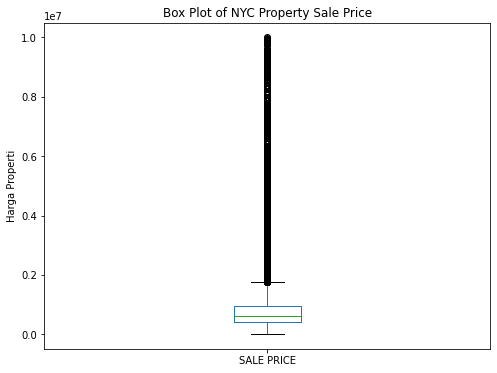

In [16]:
# Box-plot data NYC Property Sale Price
df['SALE PRICE'].plot(kind='box', figsize=(8,6))

plt.title('Box Plot of NYC Property Sale Price')
plt.ylabel('Harga Properti')

plt.show()

Hasil dari Box Plot menunjukkan bahwa data tidak terdistribusi secara merata dan masih banyak outliers yang ada

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.015, 'Distribution of NYC Property Sale Price')

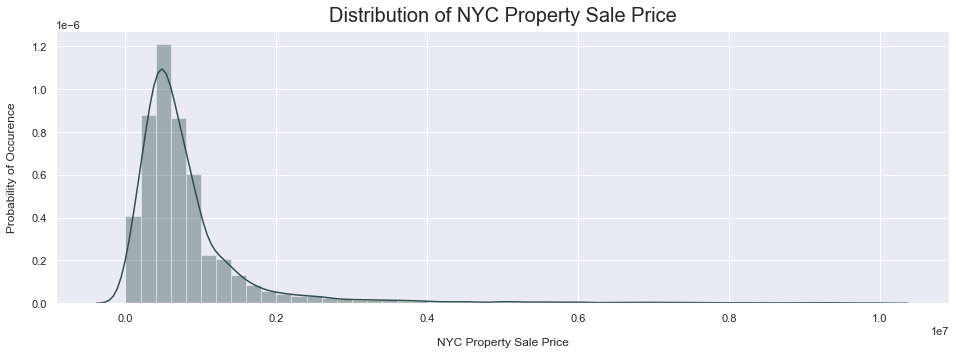

In [17]:
# Plot Distribution
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df['SALE PRICE'], color='darkslategrey')
plt.xlabel('NYC Property Sale Price', labelpad=14)
plt.ylabel('Probability of Occurence', labelpad=14)
plt.title('Distribution of NYC Property Sale Price', y=1.015, fontsize=20)

## Hypothesis Testing

Kita akan melakukan hypothesis testing untuk menentukan apakah mean dari property sale price di Bronx sama dengan Staten Island.
- Null hypothesis: $ \mu_{Bronx} = \mu_{Staten Island} $
- Alternative Hypothesis: $ \mu_{Bronx} \neq \mu_{Staten Island} $

In [18]:
# Jumlah data masing-masing Borough
df['BOROUGH'].value_counts()

3    15105
4    10699
2     4930
5     4922
1      645
Name: BOROUGH, dtype: int64

Dari data tersebut, kita akan mengambil data Bronx dan Staten Island karena memiliki jumlah data yang hampir sama

In [26]:
# Set data Bronx dan Staten Island
df_bronx = df[df['BOROUGH'] == 2]
df_staten_island = df[df['BOROUGH'] == 5]

# Hitung jumlah data, mean, dan stdev masing-masing data
n_bronx = len(df_bronx)
mu_bronx = df_bronx['SALE PRICE'].mean()
sd_bronx = df_bronx['SALE PRICE'].std()
print('BRONX')
print('Jumlah data: ', n_bronx)
print('Mean: ', mu_bronx)
print('Std Dev Bronx: ', sd_bronx)
print('')

n_staten_island = len(df_staten_island)
mu_staten_island = df_staten_island['SALE PRICE'].mean()
sd_staten_island = df_staten_island['SALE PRICE'].std()
print('Staten Island')
print('Jumlah data: ', n_staten_island)
print('Mean: ', mu_staten_island)
print('Std Dev Bronx: ', sd_staten_island)

BRONX
Jumlah data:  4930
Mean:  593250.1427991886
Std Dev Bronx:  957386.648826048

Staten Island
Jumlah data:  4922
Mean:  536668.679195449
Std Dev Bronx:  384914.4900905535


In [20]:
# Calculate z-stat & p-value
sm.stats.ztest(df_bronx['SALE PRICE'], df_staten_island['SALE PRICE'], alternative='two-sided')

(3.8474280210116696, 0.00011936432979782005)

Karena nilai **p-value** sangat kecil, kita dapat **reject the Null Hypothesis** bahwa rata-rata harga jual di wilayah Bronx sama dengan Staten Island. Untuk lebih jelasnya kita dapat membuat histogram plot dari kedua data tersebut sebagai berikut.

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


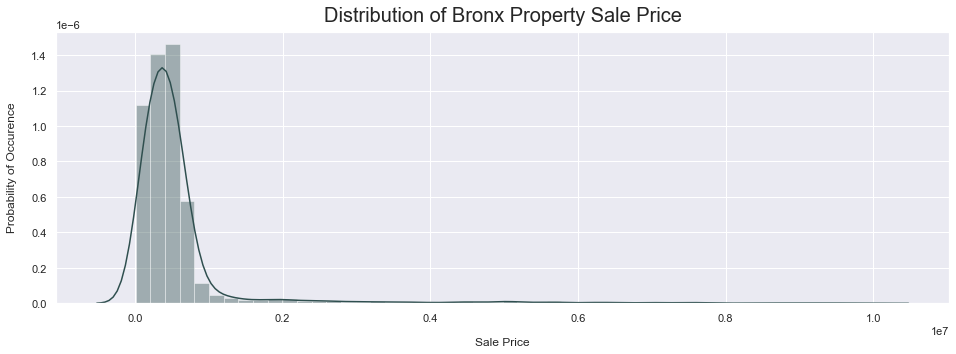

C:\Users\890092\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


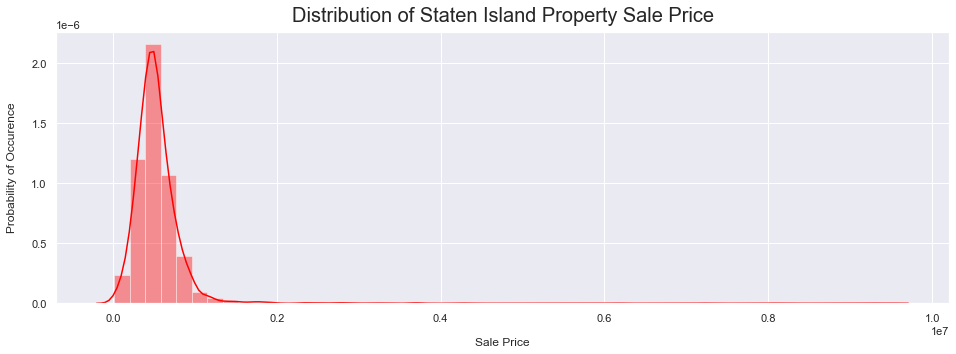

In [21]:
# Distribution Plot Bronx Sale Price 
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df_bronx['SALE PRICE'], color='darkslategrey')
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Probability of Occurence', labelpad=14)
plt.title('Distribution of Bronx Property Sale Price', y=1.015, fontsize=20)
plt.show()

# Distribution Plot Staten Island Sale Price
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(df_staten_island['SALE PRICE'], color='red')
plt.xlabel('Sale Price', labelpad=14)
plt.ylabel('Probability of Occurence', labelpad=14)
plt.title('Distribution of Staten Island Property Sale Price', y=1.015, fontsize=20)
plt.show()